<h1> Logistic Regression

<ul>
<li>Hồi quy logistic là một trong những thuật toán được sử dụng nhiều nhất trong học máy.</li>
<li>Trước khi có deep learning, hồi quy logistic là lựa chọn mặc định để giải quyết các bài toán phân loại thực tế với hàng trăm nghìn features.</li>
<li>Hồi quy logistic có thể được sử dụng trong các bài toán binary, multi-class và multi-label</li>  
</ul>

In [38]:
from IPython.display import display, Math, Latex
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

<h2> Implementation

Trong phần đầu tiên của bài tập này, ta sẽ thực hiện từng bước của thuật toán hồi quy logistic cho bài toán phân loại nhị phân (binary)

<h2> Mô hình

<ul>
<li>Như chúng ta đã biết, thuật toán hồi quy logistic sẽ thực hiện tính toán xác suất của mẫu, đại diện bởi các feature vector x, được phân loại là class 1: $\Pr(y=1|x)$.</li>
<li>Hai bước thực hiện:</li>
<ol>
<li>linear combination of features</li>
<li>sigmoid activation</li>
</ol>
<li>Thực hiện các bước trên để tính toán xác suất của class 1:</li>
<ol>
<li>Bước đầu tiên là thực hiện linear combination of features và ta nhận được vector $z = w^T x$</li>
<li>Bước thứ hai là đưa hàm sigmoid vào z và nhận được hàm xác suất như sau:</li>
</ol>
$$\Pr(y=1|x) = \text{sigmoid}(z) = \frac{1}{1+e^{-z}}$$
</ul>

Việc vector hóa giúp ta có thể tính các xác suất cho từng quan sát cùng một lúc như dưới đây:<br>
1. Vector hóa linear combination of features giúp viêc tính toán hiệu quả hơn:
    $$z_{n \times 1} = X_{n \times m} \cdot w_{m \times 1}$$
    Trong đó:
    <ul>
<li>The feature matrix $X$ $(n,m)$</li>
<li>Vector trọng số $w$ có $m$ thành phần</li>
<li>Vector linear combination $z$ có $n$ thành phần</li>
</ul>

In [ ]:
# Let's implement linear combination in vectorized form
def linear_combination(X:np.ndarray, w:np.ndarray) -> np.ndarray:
    '''Calculates linear combination of features.

The linear combination is calculated with the following vectorized form:
    z = Xw
Args:
    X: feature matrix with shape (n, m)
    w: weight vector with shape (m,)
Returns:
    Linear combination of features with shape (n,)
    '''
    return X@w

2. Vector hóa hàm sigmoid (logistic) activation để thu về vector xác suất:
$$
\Pr(y=1|X)_{n \times 1} = \text{sigmoid}(z_{n \times 1})
$$
    Trong đó:
    <ul>
<li>Hàm sigmoid được đưa vào trong vector $z$ với $n$ thành phần và kết quả trả ra là vector xác suất (activation vector) với $n$ thành phần
</ul>

In [ ]:
# Let's implement sigmoid function in a vectorized form
def sigmoid(z:np.ndarray) -> np.ndarray:
    '''Calculates sigmoid of linear combination of features z.
Args:
    z: List of floats
Returns:
    List of output of sigmoid function
    '''
    return 1/(1+np.exp(-z))

Tiếp sau đó, ta thực hiện đưa hàm vector hóa dự báo (prediction) vào hàm sigmoid, kết quả trả ra là nhãn phân loại. Nếu như giá trị xác suất > giá trị threshold thì ta sẽ đánh nhãn cho quan sát đó là 1 hoặc 0, tùy cách định nghĩa dữ liệu ban đầu

In [ ]:
def predict(X:np.ndarray, w:np.ndarray, threshold:float) -> np.ndarray:
    '''Predicts class label for samples.
The samples are representd with a bunch of features and are presented in form of a feature matrix X. The class label is predicted as follows:
* if sigmoid(Xw) > threshold, the sample is labeled with class 1
    * else class 0.
Args:
    X: feature vector of shape (n,m)
    w: weight vector of shape (m,)
    threshold: probability threshold for classification
Returns:
    A list of class labels of shape (n,)
    '''
    return np.where(sigmoid(linear_combination(X, w)) > threshold, 1, 0)

<h2> Loss function

Tiếp theo ta sẽ thực hiện hàm loss Binary Cross Entropy (BCE) + tham số phạt (regularization). Hàm mất mát (loss) cơ bản không đi kèm tham số phạt có thể được thực hiện sau khi set tham số phạt $\lambda$ = 0 <br>

Phương trình chung của hàm mất mát như dưới đây:
$$ \text{BCE} = \color{blue}{ \text{ BCE on training examples } } + \lambda \color{red}{\text{ regularization penalty}}$$

Lưu ý rằng **regularization rate** $\lambda$ kiểm soát **trọng số của regularization penalty** được sử dụng

Bằng việc đặt $\lambda = 0$, chúng ta nhận được **binary cross entropy loss** như sau:

\begin{eqnarray}
 \text{BCE} &=& \color{blue}{ \text{ BCE on training examples } } + 0 \color{red}{\text{ regularization penalty}} \\
 &=& \color{blue}{ \text{ BCE on training examples } } + 0 \\
 &=& \color{blue}{ \text{ BCE on training examples } }
\end{eqnarray}

Chúng ta sử dụng $\text{L}_2$ và $text{L}_1$ regularization trong Hồi quy Logistic

Với **$\text{L}_2$ regularization**, hàm mất mát có phương trình như sau:
$$
J(\mathbf{w}) = - \left(\sum_{i=1}^{n} y^{(i)}\text{log}\left(\text{sigmoid}(\mathbf{w}^T x^{(i)})\right) + (1 - y^{(i)}) \text{log} \left(1-\text{sigmoid}(\mathbf{w}^T x^{(i)})\right) \right) + \lambda \color{blue}{||\mathbf{w}||^2}
$$

Với **$\text{L}_1$ regularization**, hàm mất mát có phương trình như sau:
$$
J(\mathbf{w}) = - \left(\sum_{i=1}^{n} y^{(i)}\text{log}\left(\text{sigmoid}(\mathbf{w}^T x^{(i)})\right) + (1 - y^{(i)}) \text{log} \left(1-\text{sigmoid}(\mathbf{w}^T x^{(i)})\right) \right) + \lambda \color{blue}{||\mathbf{w}||}
$$

Để viết hàm loss dạng vector, đầu tiên ta phải tính thành phần bên trong tổng dưới dạng vector hóa như sau:
$$
e = y \log(\text{sigmoid}(Xw)) + (1-y) \log(1-\text{sigmoid}(Xw))
$$
Hàm loss trở thành:
$$J(w) = -1^T_{1 \times n} e_{n \times 1}$$
Thêm tham số phạt $\text{L}_2$, ta có:
$$J(w) = -1^T e + \lambda w^Tw $$
Thêm tham số phạt $\text{L}_1$, ta có:
$$J(w) = -1^T e + \lambda 1^T|w|$$
Hàm mất mát sẽ thực hiện tính toán sử dụng **vector nhãn thực tế, vector sigmoid, vector trọng số và tham số phạt $\text{L}_1$ và $\text{L}_2$**
<ul>
<li>Đặt lại giá trị regularization = 0 nếu không cần thiết </li>
<li>Nếu ta đặt các giá trị regularization = 1, ta sẽ thu được elastic net regularization, nói cách khác, với trường hợp elastic net classifier, ta có l1_reg_rate + l2_reg_rate = 1</li>
</ul>
Hàm mất mát trả về một giá trị vô hướng biểu diễn tổng lỗi trên toàn bộ các mẫu huấn luyện cho một lựa chọn cụ thể của vectơ trọng số.

In [ ]:
def loss(y, sigmoid_vector, weight_vector, l1_reg_rate, l2_reg_rate):
    return (-1 * (np.sum(y * np.log(sigmoid_vector) + (1-y) * np.log(1-sigmoid_vector)))
            + l2_reg_rate * np.dot(np.transpose(weight_vector), weight_vector)
            + l1_reg_rate * np.sum(np.abs(weight_vector)))

<h2> Optimization

Tiếp theo chúng ta sẽ tiến hành tối ưu hóa. Để làm được điều này ta sẽ sử dụng các kỹ thuật tối ưu lặp như là Gradient Descent (GD), mini-batch Gradient Descent (MBGD) or stochastic Gradient Descent (SGD) <br>
Ta cần chỉnh sửa cách cập nhật gradient cho phù hợp với hàm mất mất của hồi quy logistic so với hồi quy tuyến tính
<ul>
<li>STEP 1: tính toán hàm mất mất của gradient </li>
<li>STEP 2: điều chỉnh độ dốc gradient bằng learning rate và sử dụng nó để cập nhật vector trọng số </li>
</ul>

<h3> Gradient of loss function

Hàm mất mát Gradient có thể được tính như sau:
$$\frac{\partial }{\partial \mathbf{w}} J(\mathbf{w}) = \mathbf{X}^T (sigmoid(\mathbf{X}\mathbf{w}) - \mathbf{y}) + \lambda \mathbf{w}$$
Trong đó:
<ul>
<li>$sigmoid(Xw)$ là vector sigmoid của các quan sát </li>
<li>y là vector nhãn </li>
<li>w là vector trọng số </li>
<li>$\lambda$ là giá trị regularization </li>
</ul>

Xây dựng hàm **calculate_gradient** sử dụng feature matrix **$X$, vector nhãn y, vector trọng số w và giá trị regularization $\lambda$** để có thể thực hiện tính toán hiệu quả hàm mất mát Gradient

In [ ]:
def calculate_gradient(X:np.ndarray, y:np.ndarray, w:np.ndarray, reg_rate:float) -> np.ndarray:
    '''Calculates gradients of loss function w.r.t weight vector on training set.
The gradient is calculated with the following vectorized operation:
    np.transpose(X)(sigmoid(Xw) - y) + \lambda w
Args:
    X: Feature matrix for training data
    y: Label vector for training data
    reg_rate: regularization rate
Returns:
    A vector of gradients.
    '''
    return np.transpose(X)@(sigmoid(linear_combination(X, w)) - y) + reg_rate * w

<h2> Logistic regression class implementation

Kết hợp các hàm ở trên, tạo một class 'LogisticRegression' <br>
Trong class này chứa các biến thành phần như sau: <br>
<ul>
<li>Vector trọng số </li>
<li>Các vector mất mát (loss) và trọng số ở mỗi bước giảm Gradient </li>
</ul>

In [39]:
class LogisticRegression_scratch(object):
    """Logistic regression model.
    y = sigmoid(X@w)
    """
    def set_weight_vector(self, w):
        self.w = w

    def linear_combination(self, X:np.ndarray) -> np.ndarray:
        '''Calculate linear combination of features.
        The linear combination is calculated with the following vectorized form:
            z = Xw
        Args:
            X: feature matrix with shape (n, m)
        Returns:
            Linear combination of features with shape (n,)
        '''
        return X@self.w

    def sigmoid(self, z: np.ndarray):
        """Return probability of input belonging class 1.
        Args:
            z : (n, ) np.ndarray
        Returns:
            sigmoid activation vector (n,) np.andarray
        """
        return 1/(1 + np.exp(-z))

    def activation(self, X:np.ndarray) -> np.ndarray:
        '''Calculates sigmoid activation for logistic regression.
        The sigmoid activation is calculated with the following vectorized form:
            act = sigmoid(Xw)
        Args:
            X: feature matrix with shape (n, m)
        Returns:
            activation vector with shape (n,)
        '''
        return self.sigmoid(self.linear_combination(X))

    def predict(self, x: np.ndarray, threshold: float = 0.5):
        """Classify input data.
        Args:
            x : (N, D) np.ndarray
            threshold: float, optional
                threshold of binary classification (default is 0.5)
        Returns:
            (N,) np.andarray
        """
        return (self.activation(x) > threshold).astype(int)

    def loss(self, X:np.ndarray, y:np.ndarray, reg_rate:float) -> float:
        '''Calculates binary cross entropy loss on training set.
        Args:
            X: feature matrix for training data
            y: label vector for training data.
            reg_rate: regularization rate
        Returns:
            loss.
        '''
        epsilon = 1e-10
        predicted_prob = self.activation(X)
        return np.mean(-y*np.log(predicted_prob + epsilon) - (1-y)*np.log(1-predicted_prob + epsilon)) + reg_rate*np.dot(np.transpose(self.w), self.w)

    def calculate_gradient(self, X:np.ndarray, y:np.ndarray, reg_rate: float) -> np.ndarray:
        '''Calculates gradient of loss function w.r.t weight vector on training set
        Args:
            X: feature matrix for training data
            y: label vector for training data.
            reg_rate: regularization rate
        Returns:
            A vector of gradients.
        '''
        return np.transpose(X)@(self.activation(X)-y) + reg_rate * self.w

    def update_weights(self, grad:np.ndarray, lr:float) -> np.ndarray:
        '''Updates the weights based on the gradient of loss function
        Weight updates are carried out with the following formula:
            w_new := w_old - lr*grad
        Args:
            grad: gradient of loss w.r.t w
            lr: learning rate
        Returns:
            Updated weight vector.
        '''
        return (self.w - lr*grad)

    def gd(self, X:np.ndarray, y:np.ndarray, num_epochs:int, lr:float, reg_rate: float) -> np.ndarray:
        '''Estimates parameters of linear regression model through gradient descent.
        Args:
            X: feature matrix for training data
            y: label vector for training data.
            num_epochs: Number of training steps
            lr: learning rate
            reg_rate: regularization rate
        Returns:
            Weight vector: final weight vector
        '''
        self.w = np.zeros(X.shape[1])
        self.w_all = []
        self.err_all = []
        for i in np.arange(0, num_epochs):
            dJdW = self.calculate_gradient(X, y, reg_rate)
            self.w_all.append(self.w)
            self.err_all.append(self.loss(X, y, reg_rate))
            self.w = self.update_weights(dJdW, lr)
        return self.w

<h2> Thực hành

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
file_path = '/content/drive/MyDrive/Môn tối ưu hóa/data_toiuu.csv'
df = pd.read_csv(file_path, encoding='utf-8', usecols=lambda x: x not in ["level_0", "index", 'Unnamed: 0'])
df.head()

,LaivayDukien,TongChiphi,TongThu-TongChi,LuongPhucap,TongThunhap,SPPhiTindung,SoduTienguiKyhan,SoduTienguiTT,PhanKhuc,SoluongSPvay,SLTCTD,TinhhinhQHTD,LichsuQHTD12T,ThoigianQHTD_nam,SoNguoiPhuthuoc,GioiTinh,Tuoi,TrinhdoHocvan,TinhtrangHonnhan,LoaihinhLienlac,SohuuNha,LoaihinhThunhap,LoaihinhCutru,LoaihinhBaohiem,Nghenghiep,LoaihinhCoquan,VitriCongtac,ThoigianCongtac_thang,LoaihinhHopdong,NguonTrano,SotienVay,ThoigianVay,Rating,Classified
0,0.0,0.0,0.00,0.00,0.00,NaN,0.0,0.0,NaN,0,0,NaN,NaN,0,0.0,Nữ,45,NaN,Đã kết hôn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Từ TSBĐ,2.800000e+08,46.0,-619983.18,NaN
1,980000.0,12980000.0,17520000.00,10500000.00,30500000.00,Đang có tiền gửi thanh toán/sử dụng dịch vụ kh...,0.0,31678621.0,Khách hàng phổ thông,0,0,Không có dư nợ,Có quan hệ tín dụng và chưa từng phát sinh nợ...,3,2.0,Nam,23,Đại học,Đã kết hôn,Chỉ có số điện thoại di động,Sở hữu một phần,Trả lương qua TK tại BIDV,Có hộ khẩu thường trú,Tham gia từ 2 loại bảo hiểm trở lên,Hành chính văn phòng,Cơ quan hành chính sự nghiệp,Lãnh đạo cấp phòng,192.0,Biên chế,"Kết hợp (từ lương, SXKD và nguồn khác)",1.000000e+08,12.0,79.20,AA-
2,2470000.0,2470000.0,4749121.67,7219121.67,7219121.67,Đang có tiền gửi thanh toán/sử dụng dịch vụ kh...,0.0,85675.0,Khách hàng cao cấp - Private,0,0,Không có dư nợ,Có quan hệ tín dụng và chưa từng phát sinh nợ...,3,0.0,Nữ,25,Đại học,Độc thân,Chỉ có số điện thoại cố định tại nhà hoặc cơ ...,Sở hữu toàn bộ 100%,Trả lương qua TK tại BIDV,Có hộ khẩu thường trú,Tham gia từ 2 loại bảo hiểm trở lên,Giáo dục,Cơ quan hành chính sự nghiệp,Chuyên viên,60.0,Biên chế,Thu nhập từ lương,1.000000e+08,60.0,78.00,A+
3,0.0,5000000.0,668138.00,5668138.00,5668138.00,Đã từng có tiền gửi thanh toán/sử dụng dịch vụ...,0.0,31267083.0,Khách hàng phổ thông,0,0,Không có thông tin,Không có thông tin,0,1.0,Nam,43,Đại học,Đã kết hôn,Chỉ có số điện thoại di động,Sở hữu toàn bộ 100%,Trả lương qua TK tại BIDV,Có hộ khẩu thường trú,Không có thông tin,Hành chính văn phòng,Cơ quan hành chính sự nghiệp,Lãnh đạo cấp phòng,240.0,HĐLĐ không xác định thời hạn,Thu nhập từ lương,3.000000e+07,12.0,76.60,A+
4,0.0,0.0,0.00,0.00,0.00,NaN,0.0,0.0,NaN,0,0,NaN,NaN,0,0.0,Nữ,43,NaN,Đã kết hôn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Từ TSBĐ,4.400000e+09,49.0,-619982.78,NaN


In [41]:
df.drop_duplicates(inplace=True)

In [42]:
df.replace("unknown", pd.NA, inplace=True)
df = df.dropna()
df = df[df['TongThunhap'] > 500000]
df = df[df['TongChiphi'] > 0]
df = df[df['ThoigianVay'] > 0]
df = df[df['Tuoi'] >= 18]

In [43]:
df['class'] = df['Rating'].apply(lambda x: 1 if x > 80 else 0)
df.head()

,LaivayDukien,TongChiphi,TongThu-TongChi,LuongPhucap,TongThunhap,SPPhiTindung,SoduTienguiKyhan,SoduTienguiTT,PhanKhuc,SoluongSPvay,SLTCTD,TinhhinhQHTD,LichsuQHTD12T,ThoigianQHTD_nam,SoNguoiPhuthuoc,GioiTinh,Tuoi,TrinhdoHocvan,TinhtrangHonnhan,LoaihinhLienlac,SohuuNha,LoaihinhThunhap,LoaihinhCutru,LoaihinhBaohiem,Nghenghiep,LoaihinhCoquan,VitriCongtac,ThoigianCongtac_thang,LoaihinhHopdong,NguonTrano,SotienVay,ThoigianVay,Rating,Classified,class
1,980000.0,12980000.0,17520000.00,10500000.00,30500000.00,Đang có tiền gửi thanh toán/sử dụng dịch vụ kh...,0.0,31678621.0,Khách hàng phổ thông,0,0,Không có dư nợ,Có quan hệ tín dụng và chưa từng phát sinh nợ...,3,2.0,Nam,23,Đại học,Đã kết hôn,Chỉ có số điện thoại di động,Sở hữu một phần,Trả lương qua TK tại BIDV,Có hộ khẩu thường trú,Tham gia từ 2 loại bảo hiểm trở lên,Hành chính văn phòng,Cơ quan hành chính sự nghiệp,Lãnh đạo cấp phòng,192.0,Biên chế,"Kết hợp (từ lương, SXKD và nguồn khác)",100000000.0,12.0,79.2,AA-,0
2,2470000.0,2470000.0,4749121.67,7219121.67,7219121.67,Đang có tiền gửi thanh toán/sử dụng dịch vụ kh...,0.0,85675.0,Khách hàng cao cấp - Private,0,0,Không có dư nợ,Có quan hệ tín dụng và chưa từng phát sinh nợ...,3,0.0,Nữ,25,Đại học,Độc thân,Chỉ có số điện thoại cố định tại nhà hoặc cơ ...,Sở hữu toàn bộ 100%,Trả lương qua TK tại BIDV,Có hộ khẩu thường trú,Tham gia từ 2 loại bảo hiểm trở lên,Giáo dục,Cơ quan hành chính sự nghiệp,Chuyên viên,60.0,Biên chế,Thu nhập từ lương,100000000.0,60.0,78.0,A+,0
3,0.0,5000000.0,668138.00,5668138.00,5668138.00,Đã từng có tiền gửi thanh toán/sử dụng dịch vụ...,0.0,31267083.0,Khách hàng phổ thông,0,0,Không có thông tin,Không có thông tin,0,1.0,Nam,43,Đại học,Đã kết hôn,Chỉ có số điện thoại di động,Sở hữu toàn bộ 100%,Trả lương qua TK tại BIDV,Có hộ khẩu thường trú,Không có thông tin,Hành chính văn phòng,Cơ quan hành chính sự nghiệp,Lãnh đạo cấp phòng,240.0,HĐLĐ không xác định thời hạn,Thu nhập từ lương,30000000.0,12.0,76.6,A+,0
10,0.0,4000000.0,18266754.00,14266754.00,22266754.00,Đang có tiền gửi có kỳ hạn tại BIDV,0.0,14774112.0,Khách hàng phổ thông,0,0,Không có dư nợ,Không có quan hệ tín dụng với các TCTD,0,0.0,Nam,39,Trên đại học,Đã kết hôn,Chỉ có số điện thoại di động,Sở hữu toàn bộ 100%,Trả lương qua TK tại BIDV,Có hộ khẩu thường trú,Tham gia từ 2 loại bảo hiểm trở lên,Hành chính văn phòng,Cơ quan hành chính sự nghiệp,Lãnh đạo cấp cao,120.0,HĐLĐ không xác định thời hạn,Thu nhập từ lương,100000000.0,12.0,85.0,AA+,1
12,9035000.0,13035000.0,21579691.67,13614691.67,34614691.67,Đang có tiền gửi thanh toán/sử dụng dịch vụ kh...,0.0,99847.0,Khách hàng phổ thông,0,0,Không có dư nợ,Có quan hệ tín dụng và chưa từng phát sinh nợ...,3,0.0,Nam,42,Đại học,Đã kết hôn,Chỉ có số điện thoại di động,Sở hữu toàn bộ 100%,Trả lương qua TK tại BIDV,Có hộ khẩu thường trú,Tham gia từ 2 loại bảo hiểm trở lên,Hành chính văn phòng,Cơ quan hành chính sự nghiệp,Chuyên viên,304.0,Biên chế,Thu nhập từ lương và nguồn khác,350000000.0,60.0,76.2,A+,0


In [44]:
df['class'].value_counts()

,count
class,
1,43259
0,32687


In [ ]:
df.describe()

,LaivayDukien,TongChiphi,TongThu-TongChi,LuongPhucap,TongThunhap,SoduTienguiKyhan,SoduTienguiTT,SoluongSPvay,SLTCTD,ThoigianQHTD_nam,SoNguoiPhuthuoc,Tuoi,ThoigianCongtac_thang,SotienVay,ThoigianVay,Rating,class
count,7.594600e+04,7.594600e+04,7.594600e+04,7.594600e+04,7.594600e+04,7.594600e+04,7.594600e+04,75946.000000,7.594600e+04,75946.000000,7.594600e+04,75946.000000,75946.000000,7.594600e+04,75946.000000,75946.000000,75946.000000
mean,2.401535e+06,1.763055e+07,5.130585e+08,1.758539e+07,5.306910e+08,3.025882e+07,1.277049e+07,0.419759,1.426046e+04,10.043031,5.270896e+04,40.243449,161.931985,1.018979e+08,28.248585,80.514865,0.569602
std,4.224636e+07,1.787625e+09,1.040028e+11,2.819295e+08,1.039881e+11,6.218418e+08,9.454150e+07,0.809545,3.929850e+06,121.134872,8.509882e+06,7.240207,92.748898,1.964028e+08,22.483792,4.365609,0.495135
min,0.000000e+00,9.300000e-01,-4.499957e+11,0.000000e+00,1.568700e+06,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,19.000000,0.000000,0.000000e+00,1.000000,59.000000,0.000000
25%,0.000000e+00,4.350000e+06,6.450000e+06,8.310000e+06,1.310000e+07,0.000000e+00,3.566422e+05,0.000000,0.000000e+00,0.000000,0.000000e+00,35.000000,96.000000,5.000000e+07,12.000000,77.600000,0.000000
50%,0.000000e+00,6.590000e+06,1.153244e+07,1.083104e+07,1.950000e+07,0.000000e+00,2.308848e+06,0.000000,0.000000e+00,1.000000,0.000000e+00,40.000000,156.000000,8.000000e+07,12.000000,80.800000,1.000000
75%,3.000000e+06,1.000000e+07,1.880397e+07,1.476910e+07,2.733605e+07,0.000000e+00,9.511168e+06,1.000000,0.000000e+00,5.000000,1.000000e+00,45.000000,223.000000,1.200000e+08,40.000000,83.600000,1.000000
max,6.250500e+09,4.500086e+11,2.792103e+13,4.500000e+10,2.792104e+13,1.110273e+11,2.156060e+10,51.000000,1.083000e+09,2023.000000,2.000000e+09,71.000000,696.000000,1.979695e+10,360.000000,153.571935,1.000000


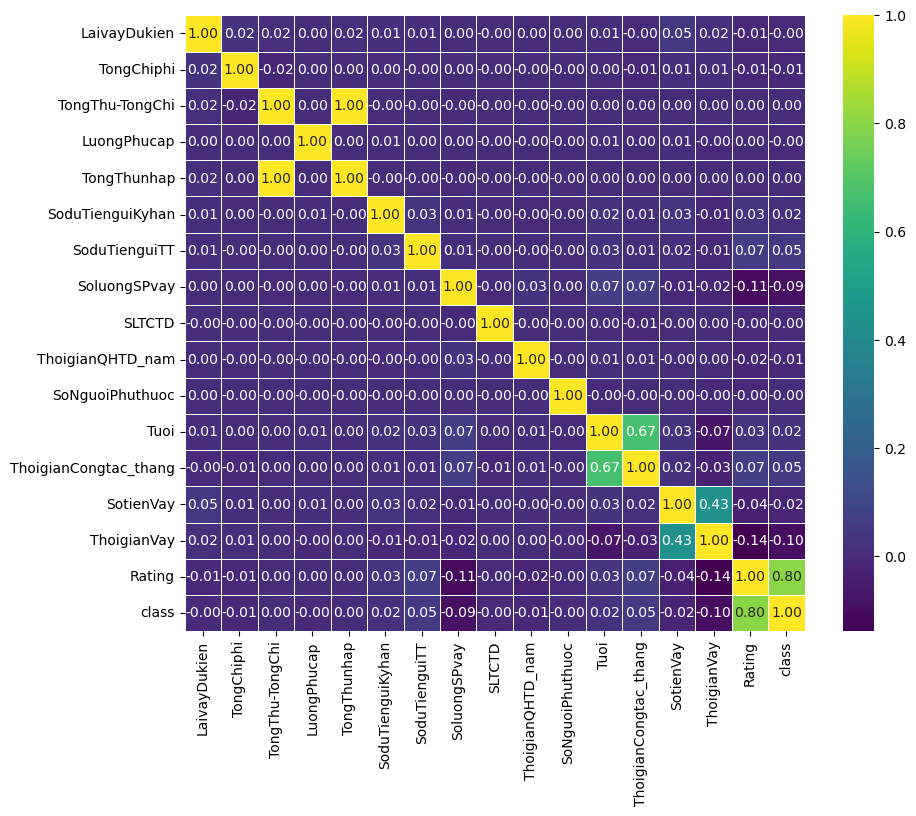

In [ ]:
# Chọn tất cả các biến số (kiểu số)
numeric_variables = df.select_dtypes(include=['int', 'float'])

# Tính ma trận tương quan
correlation_matrix = numeric_variables.corr()

# Vẽ heatmap cho ma trận tương quan
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.show()

In [ ]:
corr = df.select_dtypes(include=['int', 'float']).corr()
corr['class'].sort_values()

,class
ThoigianVay,-0.100157
SoluongSPvay,-0.092714
SotienVay,-0.020486
ThoigianQHTD_nam,-0.012400
TongChiphi,-0.006451
LaivayDukien,-0.004840
SLTCTD,-0.004175
LuongPhucap,-0.001469
SoNguoiPhuthuoc,-0.000875
TongThunhap,0.002268


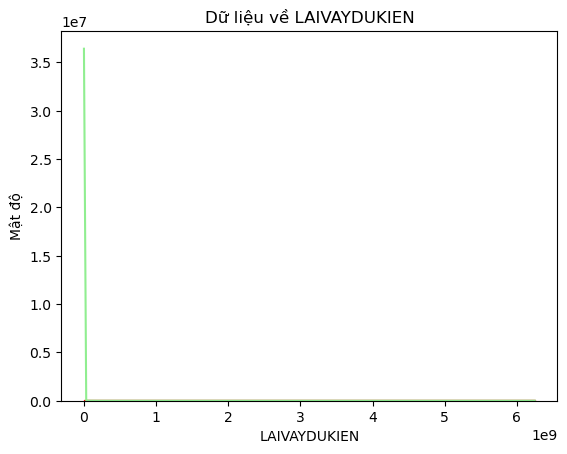

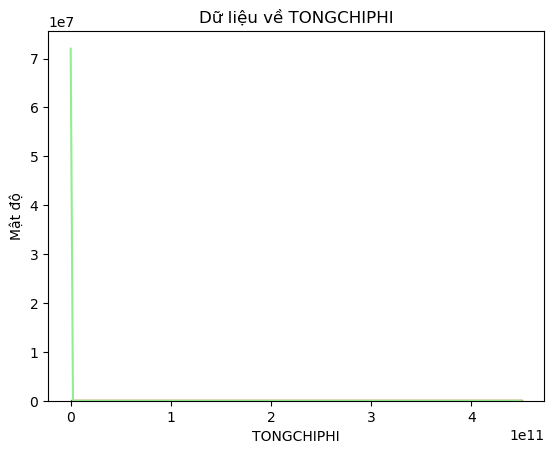

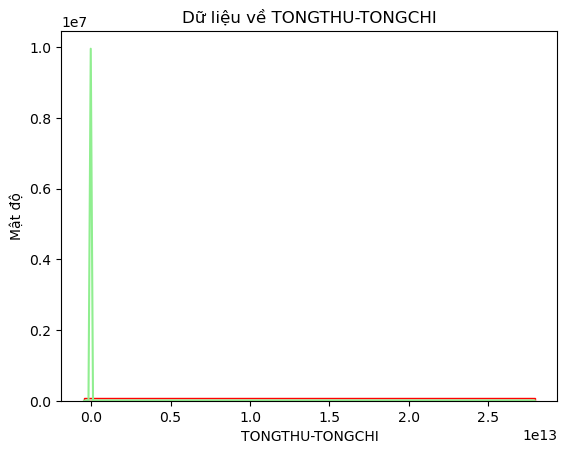

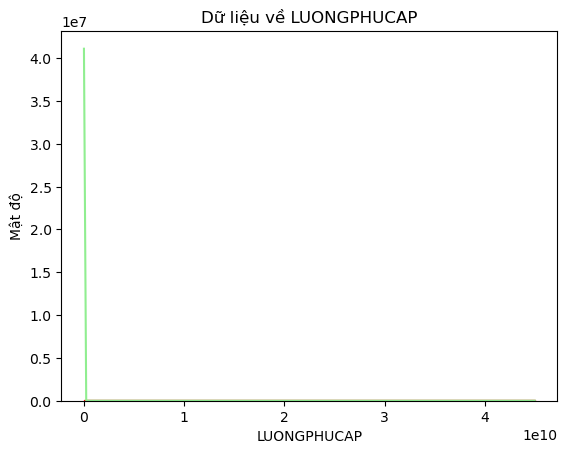

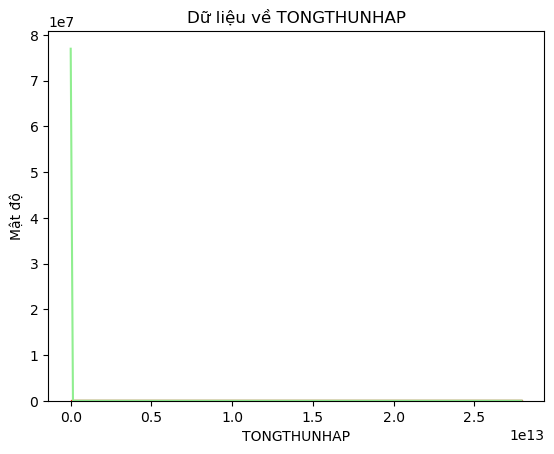

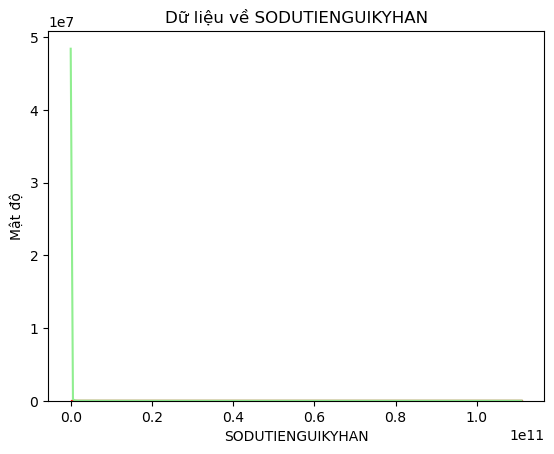

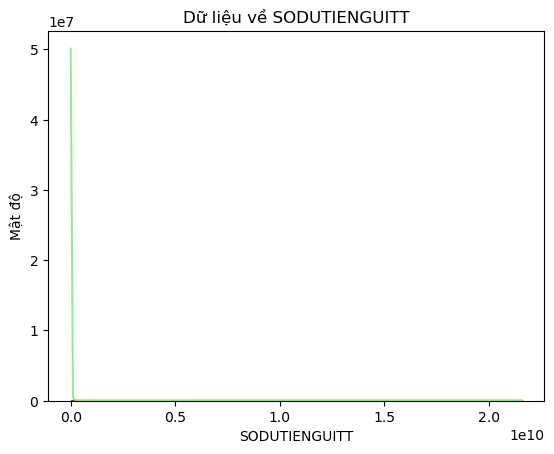

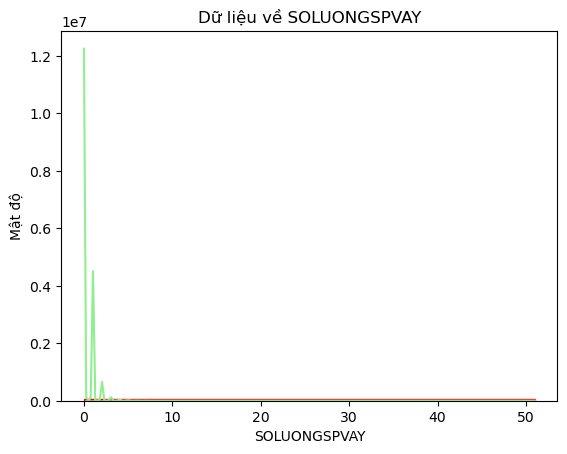

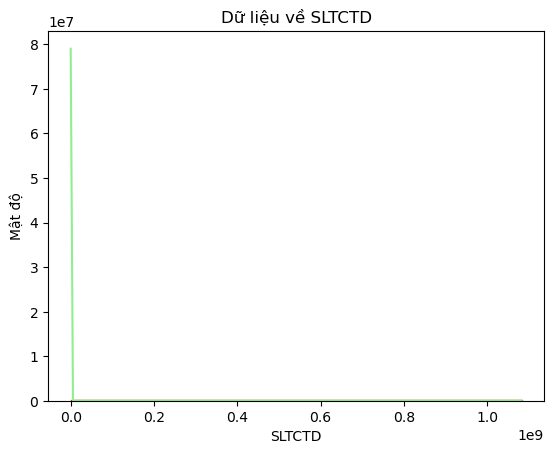

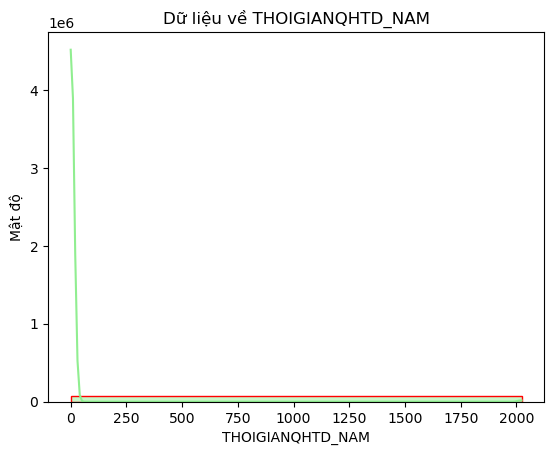

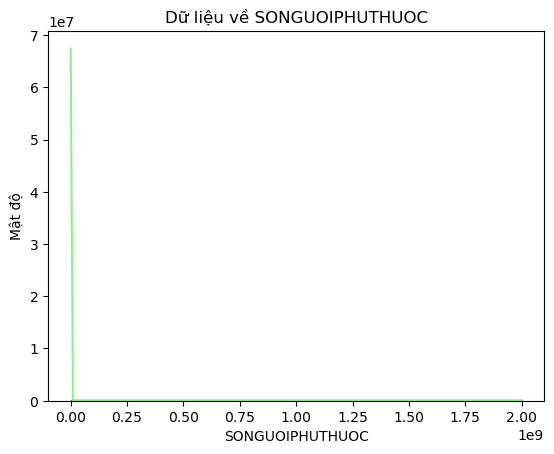

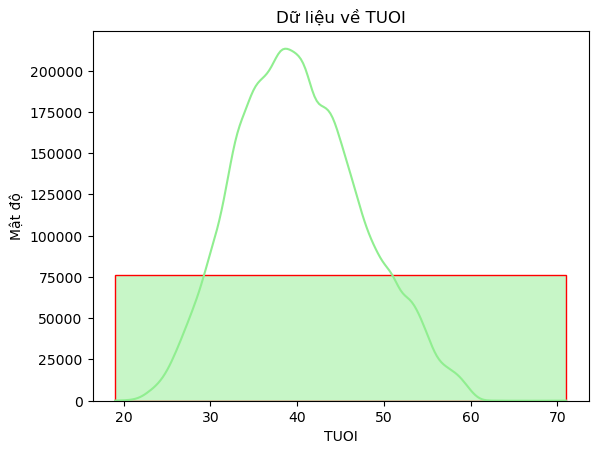

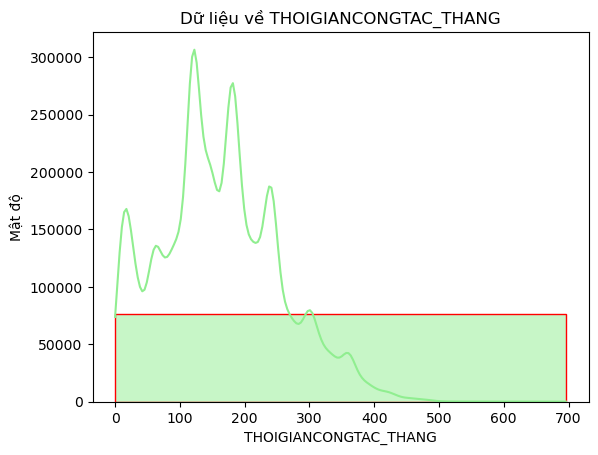

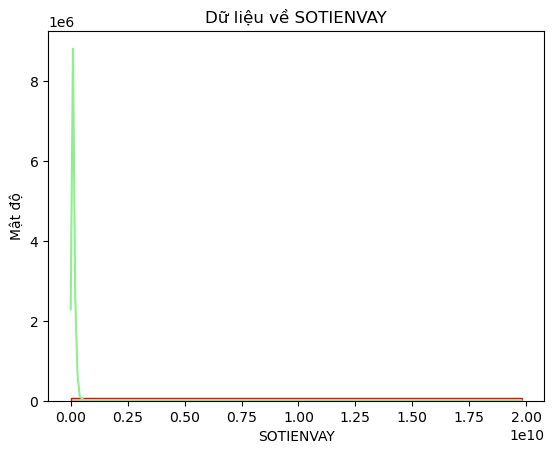

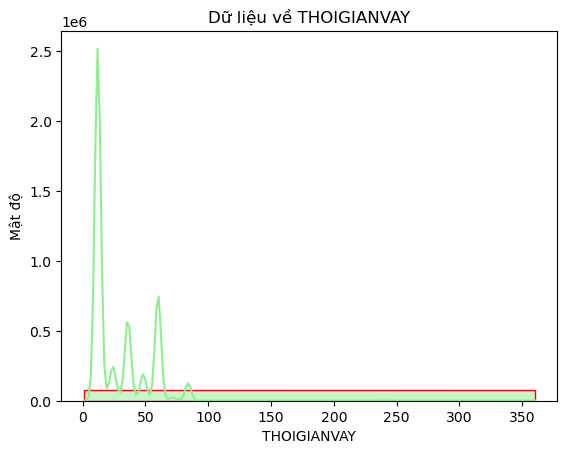

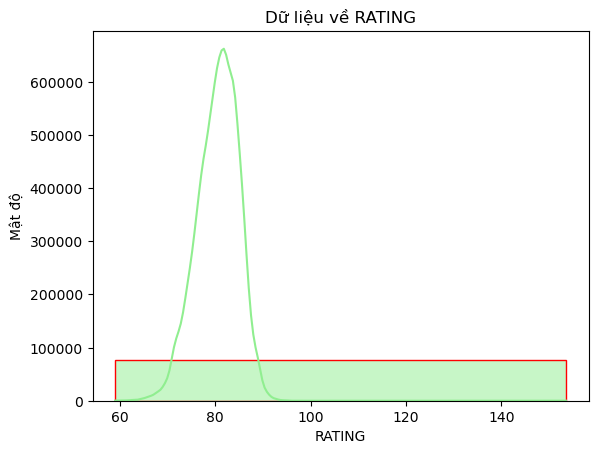

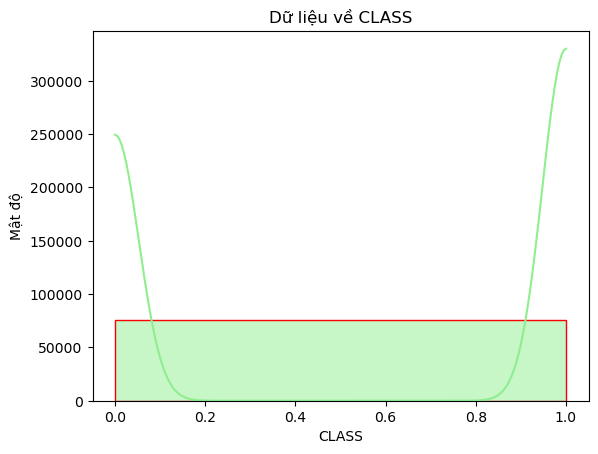

In [ ]:
numberli = df.select_dtypes(include=[np.number]).columns
import matplotlib.pyplot as plt
for i in numberli:
    sns.histplot(df[i], bins=1, kde=True, color='lightgreen', edgecolor='red')
    plt.xlabel(i.upper())
    plt.ylabel('Mật độ')
    plt.title(f'Dữ liệu về {i.upper()}')
    plt.show()

In [45]:
df = df.drop(['TongThu-TongChi', 'Rating', 'TongChiphi', 'LaivayDukien', 'SLTCTD', 'LuongPhucap', 'SoNguoiPhuthuoc', 'TongThunhap', 'Classified', 'PhanKhuc'], axis=1)

In [46]:
"""## Data encoder"""
X = df.drop("class", axis=1)
y = df["class"]

continuous_features = X.select_dtypes(include=[np.number]).columns


category_features = X.select_dtypes(include=[np.object_]).columns

In [47]:
ordinal_cols = ["LoaihinhCoquan",
                "LoaihinhCutru",
                "LoaihinhThunhap",
                "TinhtrangHonnhan",
                "TrinhdoHocvan",
                "LoaihinhBaohiem",
                "VitriCongtac",
                "SohuuNha",
                "NguonTrano",
                "LoaihinhHopdong",
                "TinhhinhQHTD",
                "LichsuQHTD12T"]
ohe_cols = ["GioiTinh",
            "SPPhiTindung",
            "LoaihinhLienlac",
            "Nghenghiep"]
assert len(ordinal_cols) + len(ohe_cols) == len(category_features)

In [48]:
from sklearn.preprocessing import (
    StandardScaler,
    OneHotEncoder,
    OrdinalEncoder,
    LabelEncoder
)
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
"""## Pipeline for data transformers"""

continuous_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="mean")),
        ("scaler", StandardScaler()),
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", continuous_transformer, continuous_features),
        ("ohe", OneHotEncoder(handle_unknown="ignore"), ohe_cols),
        ("ord", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1), ordinal_cols),
    ], remainder="passthrough"
)

label_encoder = LabelEncoder()

In [50]:
"""### Split data"""
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y,
    shuffle=True,
)

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

smote = SMOTE(random_state=42)
X_train_processed, y_train = smote.fit_resample(X_train_processed, y_train)
# y_train_encoded = label_encoder.fit_transform(y_train)
# y_test_encoded = label_encoder.transform(y_test)

In [ ]:
ohe_feature_names = preprocessor.named_transformers_['ohe'].get_feature_names_out(ohe_cols)

all_feature_names = np.concatenate(
    [continuous_features, ohe_feature_names, ordinal_cols]
)

X_train_processed_df = pd.DataFrame(X_train_processed, columns=all_feature_names)
X_train_processed_df.head()

,SoduTienguiKyhan,SoduTienguiTT,SoluongSPvay,ThoigianQHTD_nam,Tuoi,ThoigianCongtac_thang,SotienVay,ThoigianVay,GioiTinh_Nam,GioiTinh_Nữ,SPPhiTindung_Chưa sử dụng dịch vụ tại BIDV,SPPhiTindung_Đang có tiền gửi có kỳ hạn tại BIDV,SPPhiTindung_Đang có tiền gửi thanh toán/sử dụng dịch vụ khác tại BIDV (trừ tiền gửi có kỳ hạn),SPPhiTindung_Đã từng có tiền gửi thanh toán/sử dụng dịch vụ khác tại BIDV trong 01 năm gần nhất (trừ tiền gửi có kỳ hạn),SPPhiTindung_Đã từng gửi tiền gửi có kỳ hạn tại BIDV trong 01 năm gần nhất,LoaihinhLienlac_Chỉ có số điện thoại cố định tại nhà hoặc cơ quan,LoaihinhLienlac_Chỉ có số điện thoại di động,LoaihinhLienlac_Có số điện thoại đi động và cố định,LoaihinhLienlac_Không có,Nghenghiep_Buôn bán,Nghenghiep_Dịch vụ ăn uống,Nghenghiep_Giao thông vận tải,Nghenghiep_Giáo dục,Nghenghiep_Hành chính văn phòng,Nghenghiep_Khác,Nghenghiep_Không có thông tin,Nghenghiep_Lâm nghiệp,Nghenghiep_Nông nghiệp,Nghenghiep_Sản xuất,Nghenghiep_Thủy hải Sản,Nghenghiep_Xây dựng,Nghenghiep_Y tế,LoaihinhCoquan,LoaihinhCutru,LoaihinhThunhap,TinhtrangHonnhan,TrinhdoHocvan,LoaihinhBaohiem,VitriCongtac,SohuuNha,NguonTrano,LoaihinhHopdong,TinhhinhQHTD,LichsuQHTD12T
0,-0.04573,-0.237235,-0.513044,-0.066150,0.517950,-1.605572,-0.243224,-0.722345,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,5.0,5.0,5.0,4.0,2.0,2.0,0.0,1.0,3.0
1,-0.04573,-0.226726,-0.513044,-0.066150,0.656060,0.710916,-0.302004,-0.722345,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,4.0,5.0,5.0,0.0,2.0,1.0,2.0,0.0,0.0
2,-0.04573,-0.237827,-0.513044,-0.082737,1.760938,1.971516,-0.008104,-0.722345,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,0.0,5.0,5.0,0.0,2.0,1.0,0.0,0.0,0.0
3,-0.04573,-0.079551,-0.513044,-0.057856,0.932279,1.357378,-0.008104,-0.722345,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,5.0,5.0,5.0,4.0,2.0,1.0,0.0,0.0,0.0
4,-0.04573,-0.047154,0.713755,-0.066150,-1.139367,-0.452715,-0.008104,1.415075,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,4.0,5.0,5.0,0.0,2.0,2.0,0.0,0.0,0.0


In [51]:
X_train_processed.shape

(69214, 44)

<h2> Using model built from scratch

In [61]:
from sklearn.metrics import accuracy_score, classification_report
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(X, weights):
    return sigmoid(np.dot(X, weights))

# Regularized cost function
def compute_cost(X, y, weights, lambda_, regularization='l2'):
    m = len(y)
    h = predict(X, weights)
    regularization_term = 0

    if regularization == 'l2':
        regularization_term = (lambda_ / (2 * m)) * np.sum(np.square(weights[1:]))  # Exclude bias term (weights[0])
    elif regularization == 'l1':
        regularization_term = (lambda_ / m) * np.sum(np.abs(weights[1:]))  # Exclude bias term (weights[0])

    cost = - (1/m) * (np.dot(y, np.log(h)) + np.dot(1 - y, np.log(1 - h))) + regularization_term
    return cost

# Regularized gradient descent
def gradient_descent(X, y, weights, alpha, num_iterations, lambda_, regularization='l2'):
    m = len(y)
    cost_history = []

    for i in range(num_iterations):
        h = predict(X, weights)
        gradient = (1/m) * np.dot(X.T, (h - y))

        # Apply regularization to gradients, but exclude bias term (weights[0])
        if regularization == 'l2':
            gradient[1:] += (lambda_ / m) * weights[1:]
        elif regularization == 'l1':
            gradient[1:] += (lambda_ / m) * np.sign(weights[1:])

        weights -= alpha * gradient
        cost = compute_cost(X, y, weights, lambda_, regularization)
        cost_history.append(cost)

        # Print cost every 100 iterations (optional)
        if i % 100 == 0:
            print(f'Cost after iteration {i}: {cost}')

    return weights, cost_history

# Initialize weights
weights = np.zeros(X_train_processed.shape[1])

# Hyperparameters
learning_rate = 0.01
iterations = 1200
lambda_ = 0

# Perform gradient descent
weights, cost_history = gradient_descent(X_train_processed, y_train, weights, learning_rate, iterations, lambda_)
# Predictions on test set
probabilities = predict(X_test_processed, weights)
predictions = probabilities >= 0.5  # Threshold at 0.5
predictions = predictions.astype(int)  # Convert boolean to int (0 or 1)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy on test set:", accuracy)

# Print classification report
print("Classification Report on test set:\n", classification_report(y_test, predictions))

Cost after iteration 0: 0.6922534004292987
Cost after iteration 100: 0.6397984725136066
Cost after iteration 200: 0.6201424374605047
Cost after iteration 300: 0.6113323435649772
Cost after iteration 400: 0.606594458254642
Cost after iteration 500: 0.6035920799302634
Cost after iteration 600: 0.6014348051086936
Cost after iteration 700: 0.5997493454072975
Cost after iteration 800: 0.598362731033207
Cost after iteration 900: 0.5971857271003096
Cost after iteration 1000: 0.5961671812453107
Cost after iteration 1100: 0.5952742468496427
Accuracy on test set: 0.6795260039499671
Classification Report on test set:
               precision    recall  f1-score   support

           0       0.60      0.77      0.67      6538
           1       0.78      0.61      0.69      8652

    accuracy                           0.68     15190
   macro avg       0.69      0.69      0.68     15190
weighted avg       0.70      0.68      0.68     15190



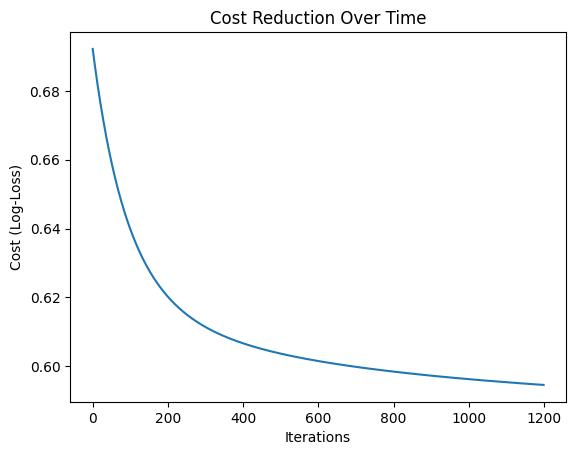

In [60]:
plt.plot(range(iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost (Log-Loss)')
plt.title('Cost Reduction Over Time')
plt.show()

<h2> Using Scikit learn library

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report

# Initialize and fit the model
model = LogisticRegression(C=0.1)
model.fit(X_train_processed, y_train)

# Predict probabilities
y_pred = model.predict(X_test_processed)
y_pred_prob = model.predict_proba(X_test_processed)[:, 1]

# Calculate the initial loss
initial_loss = log_loss(y_test, y_pred_prob)
print(f'Initial Loss (sklearn model): {initial_loss}')
print(classification_report(y_test, y_pred))

Initial Loss (sklearn model): 0.56625133084604
              precision    recall  f1-score   support

           0       0.64      0.74      0.69      6538
           1       0.78      0.69      0.73      8652

    accuracy                           0.71     15190
   macro avg       0.71      0.71      0.71     15190
weighted avg       0.72      0.71      0.71     15190

